<a href="https://colab.research.google.com/github/convin305/Hankyung_academy_Deep_Learning/blob/main/%ED%94%BC%EB%A7%88%EC%9D%B8%EB%94%94%EC%96%B8_%EB%8B%B9%EB%87%A8%EB%B3%91%EC%98%88%EC%B8%A1_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 피마인디언 당뇨병 예측

## 데이터 인풋 

In [1]:
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]


Saving pima-indians-diabetes.csv to pima-indians-diabetes (1).csv


In [2]:
filename

'pima-indians-diabetes.csv'

In [3]:
import pandas as pd
df = pd.read_csv("pima-indians-diabetes.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [5]:
import numpy as np
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

## 데이터 전처리 및 트레인 / 테스트 분할

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1],
    stratify = df.iloc[:,-1],random_state=2021)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

## 모델 정의 / 설정 / 학습 / 평가 

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()
model.add(Dense(12,input_dim=8, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 2,293
Trainable params: 2,293
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
history= model.fit(X_train,y_train,validation_split=0.2,epochs=200,batch_size=50,verbose=2)

Epoch 1/200
10/10 - 1s - loss: 0.6926 - accuracy: 0.6304 - val_loss: 0.6923 - val_accuracy: 0.5862
Epoch 2/200
10/10 - 0s - loss: 0.6909 - accuracy: 0.6674 - val_loss: 0.6915 - val_accuracy: 0.5862
Epoch 3/200
10/10 - 0s - loss: 0.6893 - accuracy: 0.6674 - val_loss: 0.6908 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6879 - accuracy: 0.6674 - val_loss: 0.6900 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6863 - accuracy: 0.6674 - val_loss: 0.6894 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6850 - accuracy: 0.6674 - val_loss: 0.6887 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6837 - accuracy: 0.6674 - val_loss: 0.6882 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6826 - accuracy: 0.6674 - val_loss: 0.6876 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6813 - accuracy: 0.6674 - val_loss: 0.6870 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6800 - accuracy: 0.6674 - val_loss: 0.6865 - val_accuracy: 0.5862
Epoch 11/

In [12]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.6472 - accuracy: 0.6510


[0.6472340226173401, 0.6510416865348816]

## 결과 시각화

In [13]:
import matplotlib.pyplot as plt

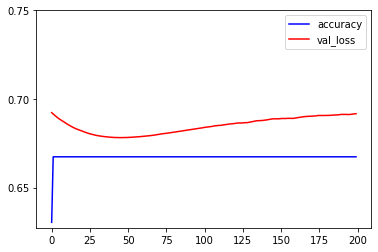

In [14]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']

x_len = np.arange(len(y_acc))

plt.plot(x_len, y_acc, 'b-',markersize=5, label='accuracy')
plt.plot(x_len, y_vloss, 'r-',markersize=5, label='val_loss')
plt.yticks([0.65,0.7,0.75])
plt.legend()
plt.show()

In [15]:
!python --version

Python 3.7.10


In [16]:
tf.__version__

'2.5.0'